In [12]:
import os
import pandas as pd
import numpy as np
import pymc as pm

import functions as func

In [13]:
import importlib
importlib.reload(func)

<module 'functions' from '/Users/natapost/Documents/gitlab/perceptual_attention_learning/data_analysis/final/bayesian/functions.py'>

## Feedback only trials

The scripts calculates the mean for the posterior distribution of the outcomes (correct/fails trials). Only trials with the feedback (key_pressed = True) were used.

In [14]:
log_folder = '/Users/natapost/Documents/ultan_files/pl/logs_to_csv'
file_names = os.listdir(log_folder)
participants = []
for f in file_names:
    if f[0] != '.' and f[0] != 'd' and f[:2] != '12' and f[:2] != 'se':
        participants.append(f[:2])

difficulty_df = pd.read_csv(log_folder + '/' + 'difficult_ams.csv', index_col = 0)
print(participants)

['22', '08', '20', '21', '09', '19', '18', '16', '02', '03', '17', '01', '15', '04', '10', '11', '05', '13', '07', '06']


In [15]:
participant = '01'
df = pd.read_csv(log_folder + '/' + participant + '.csv')
df = func.getStageIndex(df)
df

,Unnamed: 0,time_stimuli_start,time_space,timestamp_stimuli_start,timestamp_key_pressed,RT,relevant_modality,stage,trial_n,go,key_pressed,correct,stage_trial
0,0,30.2595,NaN,1.683531e+09,NaN,NaN,AUD,training,1,True,False,0,1
1,1,32.5061,NaN,1.683531e+09,NaN,NaN,AUD,training,2,False,False,1,2
2,2,34.7921,NaN,1.683531e+09,NaN,NaN,AUD,training,3,False,False,1,3
3,3,36.9962,NaN,1.683531e+09,NaN,NaN,AUD,training,4,True,False,0,4
4,4,39.0667,NaN,1.683531e+09,NaN,NaN,AUD,training,5,False,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,235,560.6887,NaN,1.683536e+09,NaN,NaN,AUD,eds2,56,False,False,1,56
836,236,562.7528,NaN,1.683536e+09,NaN,NaN,AUD,eds2,57,True,False,0,57
837,237,565.1932,565.8951,1.683536e+09,1.683536e+09,0.7019,AUD,eds2,58,True,True,1,58
838,238,567.4730,NaN,1.683536e+09,NaN,NaN,AUD,eds2,59,False,False,1,59


In [19]:
outcome_folder = 'outcomes_binomial_beta_prior_feedback_trials_only'
outcome_folder_files = os.listdir(outcome_folder + '/tables')
stages = ['ids1','eds1', 'ids2', 'eds2']
title = 'feedback_only'
done_files = []


for participant in participants:
    if participant != '18':
        pass
    else:
        continue
    
    
    print('                 -----------!!!!-----------')
    print('Analysing participant', participant)
    print('log_file:', participant + '.csv')
    df = pd.read_csv(log_folder + '/' + participant + '.csv')
    df = func.getStageIndex(df)
    
    for stage in stages:
        trial_n = []
        means = []
        hdi_3_all = []
        hdi_97_all = []
        csv_file_name = participant + '_' + stage + '_bayesian_feedback_only.csv'
        print(csv_file_name)
        if csv_file_name in outcome_folder_files:
            print('this stage has been already done')
            continue
        else:
            progress_df = pd.DataFrame()
            print(f'creating a new file for participant {participant} stage {stage}')

        df_stage = df[df.stage == stage]
        observed_data = []

        for index, row in df_stage.iterrows():
            if row.key_pressed == True:
                pass
            else:
                continue

            print(' ')
            print('trial', row.stage_trial)
            trial_n.append(row.stage_trial)
            observed_data.append(row.correct)
            print('observed data', observed_data)
            mean, hdi_3, hdi_97 = func.distribution_update(observed_data)
            means.append(mean)
            hdi_3_all.append(hdi_3)
            hdi_97_all.append(hdi_97)

        go_trials = df_stage[df_stage.go == True].stage_trial
        func.graph_plotting(trial_n, means, hdi_3_all, hdi_97_all, observed_data, participant, stage, go_trials, title, outcome_folder)
        progress_df['trial_n'] = trial_n
        progress_df[f'{stage}_mean'] = means
        progress_df[f'{stage}_hdi_3'] = hdi_3_all
        progress_df[f'{stage}_hdi_97'] = hdi_97_all
        #print(progress_df)
        progress_df.to_csv(outcome_folder + '/' + csv_file_name)

        #break
    done_files.append(participant)
    done_files.sort()
    print(' ')
    print('done files:', done_files)
    #break

                 -----------!!!!-----------
Analysing participant 22
log_file: 22.csv
22_ids1_bayesian_feedback_only.csv
this stage has been already done
22_eds1_bayesian_feedback_only.csv
this stage has been already done
22_ids2_bayesian_feedback_only.csv
this stage has been already done
22_eds2_bayesian_feedback_only.csv
this stage has been already done
 
done files: ['22']
                 -----------!!!!-----------
Analysing participant 08
log_file: 08.csv
08_ids1_bayesian_feedback_only.csv
this stage has been already done
08_eds1_bayesian_feedback_only.csv
this stage has been already done
08_ids2_bayesian_feedback_only.csv
this stage has been already done
08_eds2_bayesian_feedback_only.csv
this stage has been already done
 
done files: ['08', '22']
                 -----------!!!!-----------
Analysing participant 20
log_file: 20.csv
20_ids1_bayesian_feedback_only.csv
this stage has been already done
20_eds1_bayesian_feedback_only.csv
this stage has been already done
20_ids2_bayesi

## Below is code for re-making the plot from the csv files

found the right file!
 
trial 3
 
trial 4
 
trial 9
 
trial 11
 
trial 12
 
trial 13
 
trial 14
 
trial 15
 
trial 19
 
trial 20
 
trial 21
 
trial 23
 
trial 26
 
trial 29
 
trial 32
 
trial 33
 
trial 36
 
trial 39
 
trial 40
 
trial 42
 
trial 44
 
trial 45
 
trial 46
 
trial 48
 
trial 49
 
trial 50
 
trial 52
 
trial 54
 
trial 55
 
trial 60


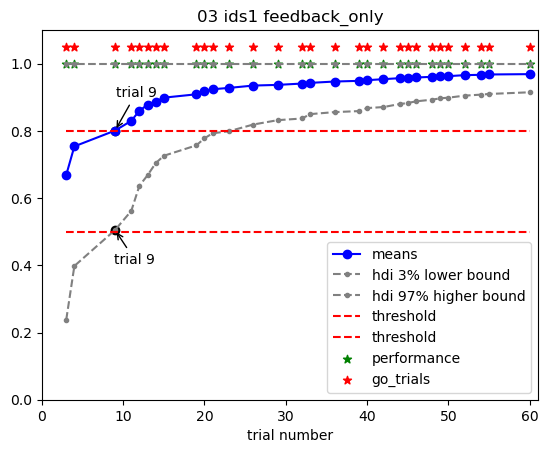

done plotting


In [33]:
outcome_folder = 'outcomes_binomial_beta_prior_feedback_trials_only/new_fixed'
#outcome_folder_files = os.listdir(outcome_folder)
#stages = ['ids1','eds1', 'ids2', 'eds2']
title = 'feedback_only'


csv_folder = 'outcomes_binomial_beta_prior_feedback_trials_only/tables'
csvs = os.listdir(csv_folder)
#print(csvs)

participant = '03'
stage = 'ids1'

for csv in csvs:
    if participant == csv.split('_')[0]:
        if stage == csv.split('_')[1]:
            pass
        else:
            continue
    else:
        continue
    
    print('found the right file!')
    path = os.path.join(csv_folder, csv)
    df_csv = pd.read_csv(path)    
        
    df_log = pd.read_csv(log_folder + '/' + participant + '.csv')
    df_log = func.getStageIndex(df_log)
    
    trial_n = []
    means = []
    hdi_3_all = []
    hdi_97_all = []
    df_stage = df_log[df_log.stage == stage]
    observed_data = []

    for index, row in df_stage.iterrows():
        if row.key_pressed == True:
            pass
        else:
            continue

        print(' ')
        print('trial', row.stage_trial)
        trial_n.append(row.stage_trial)
        observed_data.append(row.correct)
        #print('observed data', observed_data)

    means = df_csv[df_csv.columns[2]]
    hdi_3_all = df_csv[df_csv.columns[3]]
    hdi_97_all = df_csv[df_csv.columns[4]]
    go_trials = df_stage[df_stage.go == True].stage_trial
    func.graph_plotting(trial_n, means, hdi_3_all, hdi_97_all, observed_data, participant, stage, go_trials, title, outcome_folder)
    print('done plotting')
